Linear Regression - R²: -281825.31, MSE: 8487115925723966464.00
Ridge Regression - R²: 0.47, MSE: 15988694161020.03


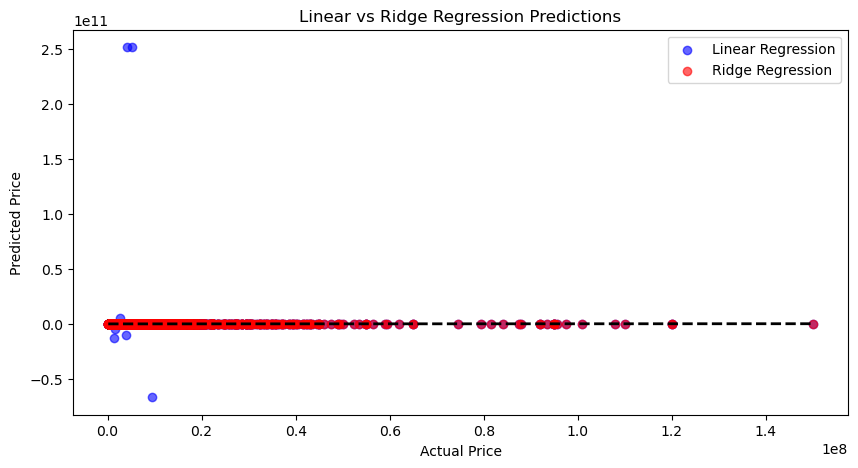

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("D:\\archive\\pakwheels_used_cars.csv") 
selected_features = ["mileage", "year", "model", "fuel_type"]
target = "price"

df = pd.get_dummies(df[selected_features + [target]], drop_first=True)
df.fillna(df.median(), inplace=True)

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Linear Regression - R²: {r2_lr:.2f}, MSE: {mse_lr:.2f}")
print(f"Ridge Regression - R²: {r2_ridge:.2f}, MSE: {mse_ridge:.2f}")

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coeff": lr_model.coef_,
    "Ridge Coeff": ridge_model.coef_
})

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6, color="blue")
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.6, color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)  # Ideal prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear vs Ridge Regression Predictions")
plt.legend()
plt.show()
